# Evaluating model
 #### three ways:
 * built-in 'score()'
 * scoring parameter
 * Problem-specific metric functions

## Evaluation of classification model

In [18]:
import pandas as pd
heart_disease = pd.read_csv('./Data/heart-disease.csv')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_tarin, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train,y_tarin);


In [19]:
clf.score(X_test,y_test)


0.8360655737704918

### Classification MOdel Evaluation Matrics

* Accuracy
* Area Under ROC curve
* Confusion Matrix
* Classification Report 

### 1 Accuracy - cross_val_score

In [20]:
cross_val_score(clf,X,y).mean()

0.8183060109289617

### 2 Area Under ROC Curve
* Area under reciever operating characteristic curve (AUC/ROC)
* compares true positive rate vs false positive rate

In [21]:
from sklearn.metrics import roc_curve

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X_train, X_test, y_tarin, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf.fit(X_train,y_tarin)

y_prob_pos = clf.predict_proba(X_test)[:, 1]

fpr,tpr,threshold = roc_curve(y_test,y_prob_pos)

In [22]:
fpr,tpr,threshold

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03448276,
        0.03448276, 0.06896552, 0.06896552, 0.13793103, 0.13793103,
        0.13793103, 0.17241379, 0.20689655, 0.20689655, 0.31034483,
        0.44827586, 0.51724138, 0.5862069 , 0.68965517, 0.68965517,
        0.75862069, 0.82758621, 0.86206897, 1.        ]),
 array([0.     , 0.0625 , 0.125  , 0.25   , 0.3125 , 0.34375, 0.40625,
        0.53125, 0.5625 , 0.59375, 0.625  , 0.625  , 0.71875, 0.78125,
        0.8125 , 0.875  , 0.90625, 0.90625, 0.96875, 0.96875, 0.96875,
        0.96875, 0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     ,
        1.     ]),
 array([2.  , 1.  , 0.99, 0.84, 0.83, 0.82, 0.8 , 0.78, 0.77, 0.76, 0.75,
        0.74, 0.71, 0.6 , 0.58, 0.56, 0.55, 0.41, 0.27, 0.2 , 0.17, 0.14,
        0.12, 0.1 , 0.09, 0.07, 0.06, 0.03, 0.  ]))

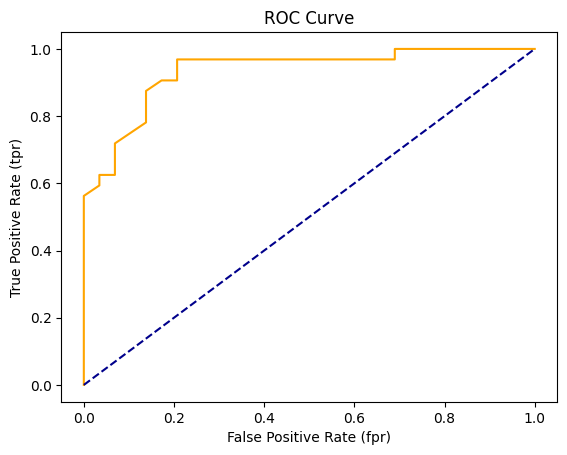

In [23]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr, c='orange', label = 'ROC')
    plt.plot([0,1],[0,1], color='darkblue', ls='--',label = 'Guessing')
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('ROC Curve')
    plt.show()

plot_roc_curve(fpr,tpr)

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_prob_pos)

0.9331896551724138

### 3 Confusion Matrix
compares the labels a model predicts and the actual label it was supposed to predict

In [25]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [26]:
# visualize confusion_matrix
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,24,5
1,3,29


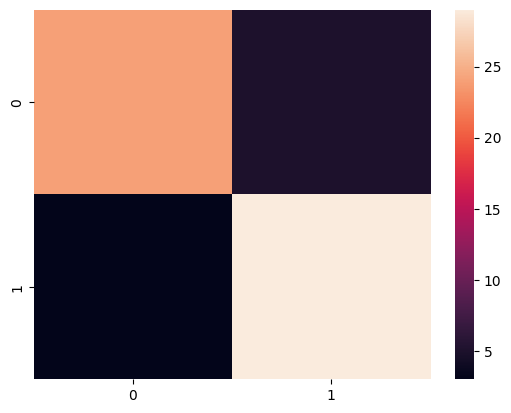

In [27]:
import seaborn as sns


confusion_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_mat);



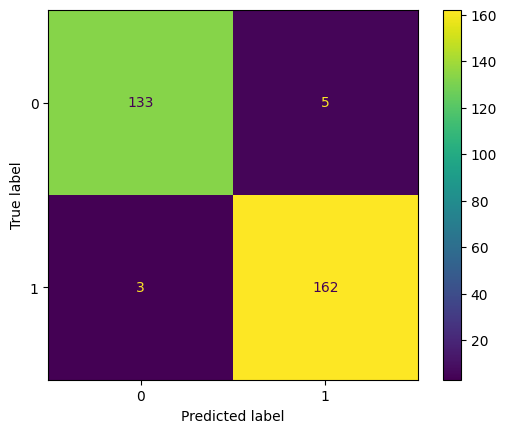

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X,y=y);

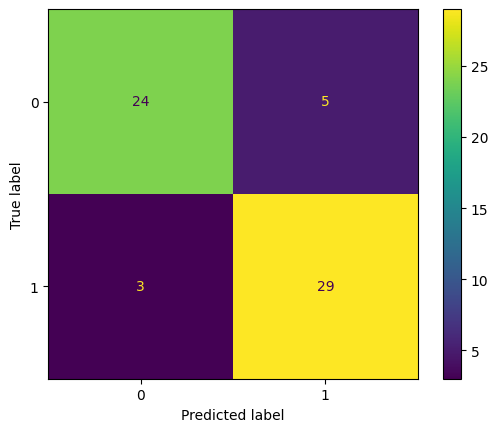

In [29]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred);

### 4 Classification Report

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### 5 log loss

In [31]:
from sklearn.metrics import log_loss

log_loss(y_test, clf.predict_proba(X_test))

0.3498467841304218

## Evaluation Of Regression Model

In [32]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_df  = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = housing['target']

X = housing_df.drop('target', axis = 1)
y = housing_df['target']

In [33]:
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_tarin, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_tarin)

RandomForestRegressor(n_estimators=200)

In [34]:
model.score(X_test,y_test)

0.8063834002464385

### Regression model evaluation metrics
* R<sup>2</sup> value
* Mean Absolute Error
* Mean Squared Error


### 1 R<sup>2</sup> value

In [37]:
from sklearn.metrics import r2_score
import numpy as np

# y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_true=y_test,y_pred=model.predict(X_test))

0.8063834002464385

### 2 Mean Absolute Error

MSE = $\frac{1}{n} \Sigma_{i=1}^n|({y}-\hat{y})|$

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_true=y_test,y_pred=model.predict(X_test))

0.3266224364462212

### 3 Mean Squared Error

MSE = $\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2$

In [40]:
mean_squared_error(y_true=y_test,y_pred=model.predict(X_test))

0.2537169306535418

### **The `scoring` parameter**
* Higher the better

#### Clasification


In [52]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,scoring=None) 
cv_acc.mean()*100

82.48087431693989

In [50]:
np.random.seed(42)

cv_precision = cross_val_score(clf,X,y,scoring='precision') 
cv_precision.mean()*100

83.29547346025925

In [51]:
np.random.seed(42)

cv_recall = cross_val_score(clf,X,y,scoring='recall') 
cv_recall.mean()*100

85.45454545454545

#### Regression

In [54]:
X = housing_df.drop('target', axis = 1)
y = housing_df['target']

model = RandomForestRegressor()

In [56]:
np.random.seed(42)

cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None) 
cv_r2.mean()*100

65.45458023124507

In [57]:
cv_neg_mean_squared_error = cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error")
cv_neg_mean_squared_error.mean()*100

-46.263041894685955